# Figure 3: Number of publications by male and female MSTP students 

This notebook uses Python3 and imports all necessary dependencies as it is run. 

**Input**: Takes in the raw datafile entitled "publications_raw_data" in the `data` directory.   
**Output**: Saves a PDF of figure 3 to `figures` directory. 

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as scs
from scipy.stats import chi2_contingency

In [2]:
# import raw data into a Pandas dataframe 
pub_DF = pd.read_csv('../data/publications_raw_data.csv') # this path may need to be updated depending on where you running this script from and where you have the raw datafile saved
pub_DF.rename(columns={'male ID':'male_ID', 'Total Pubs':'total_pubs_male', 'First Author':'first_author_male', 'female ID':'female_ID', 'Total Pubs.1':'total_pubs_female', 'First Author.1':'first_author_female'}, inplace=True)
male_pubs = pub_DF[['male_ID', 'total_pubs_male', 'first_author_male']]
female_pubs = pub_DF[['female_ID', 'total_pubs_female', 'first_author_female']]
female_pubs = female_pubs.dropna()

# convert all datatypes to ints
male_pubs = male_pubs.astype(int)
female_pubs = female_pubs.astype(int)

# uncomment this to print the dataframes
# male_pubs
# female_pubs

In [3]:
# determine the average + SD first and total publications for men and women 

# total pubs
avg_total_male = male_pubs['total_pubs_male'].mean()
std_total_male = male_pubs['total_pubs_male'].std()
avg_total_female = female_pubs['total_pubs_female'].mean()
std_total_female = female_pubs['total_pubs_female'].std()

# first author pubs 
avg_first_male = male_pubs['first_author_male'].mean()
std_first_male = male_pubs['first_author_male'].std()
avg_first_female = female_pubs['first_author_female'].mean()
std_first_female = female_pubs['first_author_female'].std()

# print below
print("Average total pubs from male students (std): ", round(avg_total_male, 3), "(", round(std_total_male, 3),")")
print("Average total pubs from female students (std): ", round(avg_total_female, 3), "(", round(std_total_female, 3),")")
print("\n")
print("Average first-author pubs from male students (std): ", round(avg_first_male, 3), "(", round(std_first_male, 3),")")
print("Average total pubs from female students (std): ", round(avg_first_female, 3), "(", round(std_first_female, 3),")")


Average total pubs from male students (std):  6.949 ( 4.616 )
Average total pubs from female students (std):  5.709 ( 4.825 )


Average first-author pubs from male students (std):  3.329 ( 2.194 )
Average total pubs from female students (std):  2.709 ( 2.432 )


                   avg       std gender
total male    6.949367  4.615744      m
total female  5.709091  4.825368      f
first male    3.329114  2.193940      m
first female  2.709091  2.431832      f


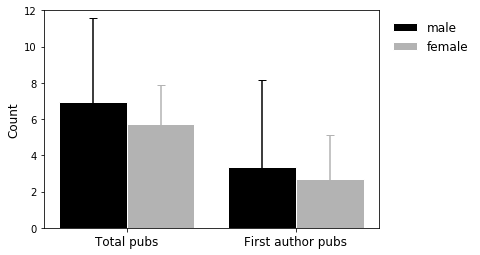

In [4]:
# set plot basic parameters
axes = plt.gca()
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# generate new dataframes with the averages and standard deviations derived above 
avg = pd.DataFrame([[avg_total_male, avg_total_female, avg_first_male, avg_first_female]], columns=['total male', 'total female', 'first male', 'first female'])
std = pd.DataFrame([[std_total_male, std_total_female, std_first_male, std_first_female]], columns=['total male', 'total female', 'first male', 'first female'])
avg = avg.T
std = std.T
fig = pd.concat([avg, std], axis=1)
fig.columns = ['avg', 'std']
fig.insert(2, "gender", ["m", "f", "m", "f"], True)
fig_grouped = fig[['avg', 'gender']]
# fig_grouped = fig_grouped.groupby(["gender"])
fig2 = fig[['std']]
std_total = fig2.loc[['total male', 'total female']]
std_first = fig2.loc[['first male', 'first female']]

print(fig)

# set width of bar
barWidth = 0.4
 
# set height of bar
male = [avg_total_male, avg_first_male]
female = [avg_total_female, avg_first_female]
 
# Set position of bar on X axis
r1 = np.arange(len(male))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, male, yerr=std_total['std'], ecolor='#000000', capsize=4, color='#000000', width=barWidth, edgecolor='white', label='male')
plt.bar(r2, female, yerr=std_first['std'], ecolor='#B3B3B3', capsize=4, color='#B3B3B3', width=barWidth, edgecolor='white', label='female')

# Set axis limits
axes.set_ylim([0,12])
 
# Add xticks on the middle of the group bars
plt.ylabel('Count', fontsize=12)
plt.xticks([r + barWidth/2 for r in range(2)], ['Total pubs', 'First author pubs'], fontsize=12)
 
# Create legend & Show graphic
plt.legend(fontsize=12, frameon=False, bbox_to_anchor=(1.3, 1))

# Save plot as a PDF
plt.savefig('../figures/figure3_publications_by_gender.pdf', dpi=300, transparent=True, bbox_inches='tight')

#

In [35]:
# pub_DF['total_pubs_female'] = pub_DF['total_pubs_female'].fillna(-1)
# pub_DF['total_pubs_female'] = pub_DF['total_pubs_female'].astype(int)
# pub_DF['total_pubs_female'] = pub_DF['total_pubs_female'].astype(str)
# pub_DF['total_pubs_female'] = pub_DF['total_pubs_female'].replace('-1', np.nan)

# pub_DF['first_author_female'] = pub_DF['first_author_female'].fillna(-1)
# pub_DF['first_author_female'] = pub_DF['first_author_female'].astype(int)
# pub_DF['first_author_female'] = pub_DF['first_author_female'].astype(str)
# pub_DF['first_author_female'] = pub_DF['first_author_female'].replace('-1', np.nan)

pub_DF = pub_DF.replace(np.nan, '', regex=True)
pub_DF

,male_ID,total_pubs_male,first_author_male,female_ID,total_pubs_female,first_author_female
0,1,4,2,1,22,14
1,2,4,1,2,5,4
2,3,2,0,3,10,4
3,4,13,5,4,6,1
4,5,15,9,5,7,4
5,6,8,3,6,4,1
6,7,7,2,7,5,4
7,8,5,2,8,3,2
8,9,0,0,9,1,1
9,10,6,2,10,3,2


In [42]:
# testing significance using a chi-square test of independence 

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
#     fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

# The first value is the Chi-square value, followed by the p-value, and finally the degrees of freedom
# This also outputs the expected frequencies in an array 
print("**There is no signicant relationship between gender and number of first authors publications**: \n", chisq_of_df_cols(pub_DF, 'first_author_male', 'first_author_female'), '\n')

print("**There is no signicant relationship between gender and number of total publications**: \n", chisq_of_df_cols(pub_DF, 'total_pubs_male', 'total_pubs_female'))

##

**There is no signicant relationship between gender and number of first authors publications**: 
 (82.33099432536773, 0.7049288117923669, 90, array([[1.51898734, 1.82278481, 6.98734177, 5.16455696, 3.34177215,
        0.91139241, 1.82278481, 0.60759494, 0.91139241, 0.91139241],
       [0.37974684, 0.4556962 , 1.74683544, 1.29113924, 0.83544304,
        0.2278481 , 0.4556962 , 0.15189873, 0.2278481 , 0.2278481 ],
       [0.82278481, 0.98734177, 3.78481013, 2.79746835, 1.81012658,
        0.49367089, 0.98734177, 0.32911392, 0.49367089, 0.49367089],
       [0.06329114, 0.07594937, 0.29113924, 0.21518987, 0.13924051,
        0.03797468, 0.07594937, 0.02531646, 0.03797468, 0.03797468],
       [0.88607595, 1.06329114, 4.07594937, 3.01265823, 1.94936709,
        0.53164557, 1.06329114, 0.35443038, 0.53164557, 0.53164557],
       [0.3164557 , 0.37974684, 1.4556962 , 1.07594937, 0.69620253,
        0.18987342, 0.37974684, 0.12658228, 0.18987342, 0.18987342],
       [0.50632911, 0.60759494, 2.32